<a href="https://colab.research.google.com/github/LeonardoR-Silva/Analise_ZOOP_Megastore/blob/main/Analise_ZOOP_Megastore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
raw_clientes = 'https://raw.githubusercontent.com/LeonardoR-Silva/Analise_ZOOP_Megastore/refs/heads/main/Dados/clientes(in).csv'
raw_vendas = 'https://raw.githubusercontent.com/LeonardoR-Silva/Analise_ZOOP_Megastore/refs/heads/main/Dados/vendas(in).csv'

dados_clientes = pd.read_csv(raw_clientes)
dados_vendas = pd.read_csv(raw_vendas)

##Verificando dados e tratando erros do dataframe

In [3]:
dados_clientes.head()

,id_cliente,nome_cliente,email,estado,plano_assinatura
0,101,Enzo Gomes,enzo.gomes@email.com,GO,Não
1,102,Heloísa Alves,heloísa.alves@email.com,SC,Não
2,103,Marcos Correia,marcos.correia@email.com,SC,Não
3,104,Luiza Silva,luiza.silva@email.com,SC,Não
4,105,Luiza Machado,luiza.machado@email.com,SC,Não


In [4]:
dados_clientes.shape

(50, 5)

In [5]:
dados_vendas.head()

,id_venda,data_venda,id_cliente,id_produto,produto,categoria,valor_venda,quantidade
0,1,2023-02-07,109.0,8.0,Livro: A Guerra dos Tronos,Livros,2677.12,2.0
1,2,2023-01-11,139.0,7.0,Headset Surround 7.1,Áudio,1210.10,1.0
2,3,2023-02-16,104.0,17.0,Mousepad Gamer XXL,Periféricos,2393.06,2.0
3,4,2023-03-20,145.0,17.0,Mousepad Gamer XXL,Periféricos,3925.92,3.0
4,5,2023-02-16,134.0,16.0,Memória RAM 16GB DDR5,Componentes,4702.89,1.0


In [6]:
dados_vendas.shape

(120, 8)

In [7]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_cliente        50 non-null     int64 
 1   nome_cliente      50 non-null     object
 2   email             50 non-null     object
 3   estado            50 non-null     object
 4   plano_assinatura  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [8]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venda     120 non-null    object 
 1   data_venda   112 non-null    object 
 2   id_cliente   112 non-null    float64
 3   id_produto   112 non-null    float64
 4   produto      112 non-null    object 
 5   categoria    112 non-null    object 
 6   valor_venda  112 non-null    float64
 7   quantidade   112 non-null    float64
dtypes: float64(4), object(4)
memory usage: 7.6+ KB


In [9]:
#Venda está como object
dados_vendas['data_venda'] = pd.to_datetime(dados_vendas['data_venda'])
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venda     120 non-null    object        
 1   data_venda   112 non-null    datetime64[ns]
 2   id_cliente   112 non-null    float64       
 3   id_produto   112 non-null    float64       
 4   produto      112 non-null    object        
 5   categoria    112 non-null    object        
 6   valor_venda  112 non-null    float64       
 7   quantidade   112 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 7.6+ KB


In [10]:
#vemos a presença de NaN no df de vendas
dados_vendas[dados_vendas.id_cliente.isnull()]

,id_venda,data_venda,id_cliente,id_produto,produto,categoria,valor_venda,quantidade
16,"17,2023-01-26,122,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN
18,"19,2023-03-08,118,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN
19,"20,2023-03-13,135,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN
33,"34,2023-03-05,149,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN
42,"43,2023-02-05,120,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN
47,"48,2023-01-01,135,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN
59,"60,2023-02-22,143,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN
91,"92,2023-01-30,124,4,""Monitor Ultrawide 34"""""",P...",NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.set_option('display.max_colwidth', 90)
dados_vendas[dados_vendas.id_cliente.isnull()].id_venda

,id_venda
16,"17,2023-01-26,122,4,""Monitor Ultrawide 34"""""",Periféricos,4952.4,3"
18,"19,2023-03-08,118,4,""Monitor Ultrawide 34"""""",Periféricos,2750.54,1"
19,"20,2023-03-13,135,4,""Monitor Ultrawide 34"""""",Periféricos,2230.8,2"
33,"34,2023-03-05,149,4,""Monitor Ultrawide 34"""""",Periféricos,4579.35,1"
42,"43,2023-02-05,120,4,""Monitor Ultrawide 34"""""",Periféricos,1732.21,1"
47,"48,2023-01-01,135,4,""Monitor Ultrawide 34"""""",Periféricos,3835.24,3"
59,"60,2023-02-22,143,4,""Monitor Ultrawide 34"""""",Periféricos,3904.65,4"
91,"92,2023-01-30,124,4,""Monitor Ultrawide 34"""""",Periféricos,208.2,3"


In [12]:
#Provavelmente ocorreu um erro ao incluir os dados das vendas com dados nulos, pois o dados das 8 vendas NaN estão como string
vendas_isnull = dados_vendas[dados_vendas.id_cliente.isnull()].id_venda
vendas_isnull.values[1]

'19,2023-03-08,118,4,"Monitor Ultrawide 34""",Periféricos,2750.54,1'

In [13]:
df_vendas_isnull_corrigido = pd.DataFrame([linha.split(',') for linha in vendas_isnull], columns = dados_vendas.columns)
df_vendas_isnull_corrigido

,id_venda,data_venda,id_cliente,id_produto,produto,categoria,valor_venda,quantidade
0,17,2023-01-26,122,4,"""Monitor Ultrawide 34""""""",Periféricos,4952.4,3
1,19,2023-03-08,118,4,"""Monitor Ultrawide 34""""""",Periféricos,2750.54,1
2,20,2023-03-13,135,4,"""Monitor Ultrawide 34""""""",Periféricos,2230.8,2
3,34,2023-03-05,149,4,"""Monitor Ultrawide 34""""""",Periféricos,4579.35,1
4,43,2023-02-05,120,4,"""Monitor Ultrawide 34""""""",Periféricos,1732.21,1
5,48,2023-01-01,135,4,"""Monitor Ultrawide 34""""""",Periféricos,3835.24,3
6,60,2023-02-22,143,4,"""Monitor Ultrawide 34""""""",Periféricos,3904.65,4
7,92,2023-01-30,124,4,"""Monitor Ultrawide 34""""""",Periféricos,208.2,3


In [14]:
df_vendas_isnull_corrigido['valor_venda'] = pd.to_numeric(df_vendas_isnull_corrigido['valor_venda'])
df_vendas_isnull_corrigido['quantidade'] = pd.to_numeric(df_vendas_isnull_corrigido['quantidade'])
df_vendas_isnull_corrigido['data_venda'] = pd.to_datetime(df_vendas_isnull_corrigido['data_venda'])

In [15]:
dados_vendas.dropna(inplace = True)
dados_vendas = pd.concat([dados_vendas,df_vendas_isnull_corrigido])
dados_vendas

,id_venda,data_venda,id_cliente,id_produto,produto,categoria,valor_venda,quantidade
0,1,2023-02-07,109.0,8.0,Livro: A Guerra dos Tronos,Livros,2677.12,2.0
1,2,2023-01-11,139.0,7.0,Headset Surround 7.1,Áudio,1210.10,1.0
2,3,2023-02-16,104.0,17.0,Mousepad Gamer XXL,Periféricos,2393.06,2.0
3,4,2023-03-20,145.0,17.0,Mousepad Gamer XXL,Periféricos,3925.92,3.0
4,5,2023-02-16,134.0,16.0,Memória RAM 16GB DDR5,Componentes,4702.89,1.0
...,...,...,...,...,...,...,...,...
3,34,2023-03-05,149,4,"""Monitor Ultrawide 34""""""",Periféricos,4579.35,1.0
4,43,2023-02-05,120,4,"""Monitor Ultrawide 34""""""",Periféricos,1732.21,1.0
5,48,2023-01-01,135,4,"""Monitor Ultrawide 34""""""",Periféricos,3835.24,3.0
6,60,2023-02-22,143,4,"""Monitor Ultrawide 34""""""",Periféricos,3904.65,4.0


In [16]:
dados_vendas = dados_vendas.reset_index().drop(columns = 'index', axis = 1)
dados_vendas

,id_venda,data_venda,id_cliente,id_produto,produto,categoria,valor_venda,quantidade
0,1,2023-02-07,109.0,8.0,Livro: A Guerra dos Tronos,Livros,2677.12,2.0
1,2,2023-01-11,139.0,7.0,Headset Surround 7.1,Áudio,1210.10,1.0
2,3,2023-02-16,104.0,17.0,Mousepad Gamer XXL,Periféricos,2393.06,2.0
3,4,2023-03-20,145.0,17.0,Mousepad Gamer XXL,Periféricos,3925.92,3.0
4,5,2023-02-16,134.0,16.0,Memória RAM 16GB DDR5,Componentes,4702.89,1.0
...,...,...,...,...,...,...,...,...
115,34,2023-03-05,149,4,"""Monitor Ultrawide 34""""""",Periféricos,4579.35,1.0
116,43,2023-02-05,120,4,"""Monitor Ultrawide 34""""""",Periféricos,1732.21,1.0
117,48,2023-01-01,135,4,"""Monitor Ultrawide 34""""""",Periféricos,3835.24,3.0
118,60,2023-02-22,143,4,"""Monitor Ultrawide 34""""""",Periféricos,3904.65,4.0


In [17]:
dados_vendas['id_venda'] = dados_vendas['id_venda'].astype('int64')
dados_vendas['id_cliente'] = dados_vendas['id_cliente'].astype('int64')
dados_vendas['id_produto'] = dados_vendas['id_produto'].astype('int64')

In [18]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venda     120 non-null    int64         
 1   data_venda   120 non-null    datetime64[ns]
 2   id_cliente   120 non-null    int64         
 3   id_produto   120 non-null    int64         
 4   produto      120 non-null    object        
 5   categoria    120 non-null    object        
 6   valor_venda  120 non-null    float64       
 7   quantidade   120 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 7.6+ KB


#Faturamento

In [19]:
dados_vendas['faturamento'] = dados_vendas.valor_venda * dados_vendas.quantidade
dados_vendas

,id_venda,data_venda,id_cliente,id_produto,produto,categoria,valor_venda,quantidade,faturamento
0,1,2023-02-07,109,8,Livro: A Guerra dos Tronos,Livros,2677.12,2.0,5354.24
1,2,2023-01-11,139,7,Headset Surround 7.1,Áudio,1210.10,1.0,1210.10
2,3,2023-02-16,104,17,Mousepad Gamer XXL,Periféricos,2393.06,2.0,4786.12
3,4,2023-03-20,145,17,Mousepad Gamer XXL,Periféricos,3925.92,3.0,11777.76
4,5,2023-02-16,134,16,Memória RAM 16GB DDR5,Componentes,4702.89,1.0,4702.89
...,...,...,...,...,...,...,...,...,...
115,34,2023-03-05,149,4,"""Monitor Ultrawide 34""""""",Periféricos,4579.35,1.0,4579.35
116,43,2023-02-05,120,4,"""Monitor Ultrawide 34""""""",Periféricos,1732.21,1.0,1732.21
117,48,2023-01-01,135,4,"""Monitor Ultrawide 34""""""",Periféricos,3835.24,3.0,11505.72
118,60,2023-02-22,143,4,"""Monitor Ultrawide 34""""""",Periféricos,3904.65,4.0,15618.60


In [20]:
dados_vendas.describe()

,id_venda,data_venda,id_cliente,id_produto,valor_venda,quantidade,faturamento
count,120.000000,120,120.00000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,2023-02-16 07:48:00,124.15000,9.650000,2742.479750,2.425000,6756.907333
min,1.000000,2023-01-01 00:00:00,101.00000,1.000000,55.020000,1.000000,97.490000
25%,30.750000,2023-01-26 18:00:00,114.00000,6.000000,1543.417500,1.000000,2602.072500
50%,60.500000,2023-02-17 12:00:00,124.00000,10.000000,2812.445000,2.000000,4789.980000
75%,90.250000,2023-03-07 00:00:00,134.00000,13.000000,3922.972500,3.000000,10737.412500
max,120.000000,2023-03-30 00:00:00,149.00000,19.000000,4976.810000,4.000000,19895.160000
std,34.785054,NaN,12.73957,5.376028,1399.236646,1.149808,5133.576886


Verificando o faturamento por mês

In [21]:
faturamento_mensal = dados_vendas.groupby(by = dados_vendas.data_venda.dt.strftime('%m/%y'))[['faturamento']].sum().sort_index()
faturamento_mensal


,faturamento
data_venda,
01/23,234634.61
02/23,282351.34
03/23,293842.93


In [22]:
crescimento_1 = (faturamento_mensal.faturamento.values[2]-faturamento_mensal.faturamento.values[0])/faturamento_mensal.faturamento.values[0]*100
crescimento_2 = (faturamento_mensal.faturamento.values[2]-faturamento_mensal.faturamento.values[1])/faturamento_mensal.faturamento.values[1]*100

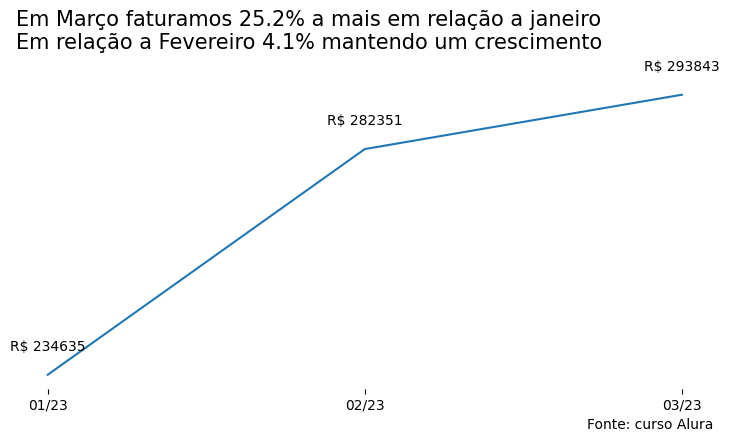

In [23]:
cores = []

for mes in faturamento_mensal.index:
  if mes == '03/23':
    cores.append('green')
  else:
    cores.append('silver')

fig , ax = plt.subplots(figsize = (9,4))

ax.set_title(f'Em Março faturamos {crescimento_1:.1f}% a mais em relação a janeiro\nEm relação a Fevereiro {crescimento_2:.1f}% mantendo um crescimento\n', loc='left', fontsize=15 )

ax.plot(faturamento_mensal.faturamento.index, faturamento_mensal.faturamento.values)

for mes, v in zip(faturamento_mensal.faturamento.index, faturamento_mensal.faturamento.values):
  ax.text( mes, v+5000, f'R$ {v:.0f}', fontsize = 10, ha= 'center')

ax.set_xlabel('Fonte: curso Alura',  fontsize = 10, loc = 'right')
ax.spines[:].set_visible(False)
ax.set_yticks([])
ax.grid(False)
imagem = ax.get_figure()
imagem.savefig('faturamento_mensal.png',transparent=False, dpi = 300, bbox_inches= 'tight')
plt.show()

Verificando o faturamento por produto

In [24]:
faturamento_categoria = dados_vendas.groupby(by = 'categoria')[['quantidade','faturamento']].sum().sort_values(by='faturamento')
faturamento_categoria

,quantidade,faturamento
categoria,,
Móveis,6.0,8083.34
Áudio,11.0,29281.47
Componentes,22.0,35468.07
Colecionáveis,17.0,55658.46
Decoração,36.0,109156.43
Eletrônicos,42.0,124973.54
Livros,49.0,140285.75
Periféricos,108.0,307921.82


In [25]:
faturamento_categoria['perc'] = faturamento_categoria.faturamento*100/ faturamento_categoria.faturamento.sum()
faturamento_categoria.perc.values[-1]

np.float64(37.97617815487776)

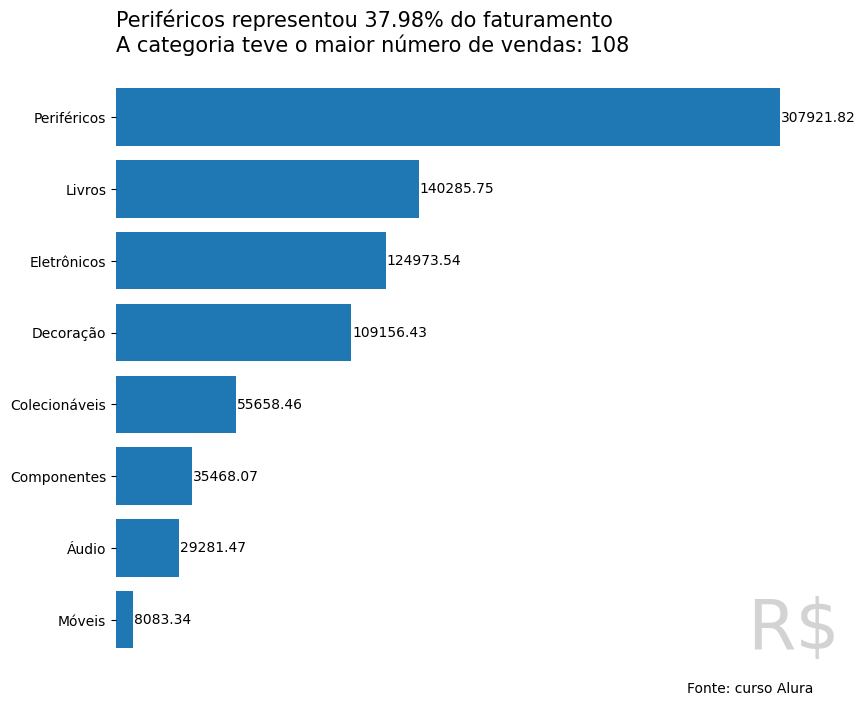

In [26]:
fig , ax = plt.subplots(figsize = (9,8))

ax.set_title(f'{faturamento_categoria.index[-1]} representou {faturamento_categoria.perc.values[-1]:.2f}% do faturamento\nA categoria teve o maior número de vendas: {faturamento_categoria.quantidade.values[-1]:.0f}', loc='left', fontsize=15 )

ax.barh(y = faturamento_categoria.index, width =  faturamento_categoria.faturamento)

for i,v in enumerate(faturamento_categoria.faturamento):
  ax.text(v + 300, i, f'{v:.2f}', fontsize = 10, ha= 'left', va = 'center')


ax.annotate('R$', xy = (v*0.95,-0.4), fontsize = 50, color ='lightgrey' )
ax.set_xlabel('Fonte: curso Alura',  fontsize = 10, loc = 'right')
ax.spines[:].set_visible(False)
ax.set_xticks([])
ax.grid(False)
imagem = ax.get_figure()
imagem.savefig('faturamento_categoria.png',transparent=False, dpi = 300, bbox_inches= 'tight')
plt.show()

#Verificando por produto e cliente

In [27]:
import sqlite3

In [28]:
dados_vendas.to_csv('vendas.csv', index = False)
dados_clientes.to_csv('clientes.csv',index = False)

In [29]:
con = sqlite3.connect('zoop_megastore.db')
dados_clientes = dados_clientes.to_sql('CLIENTES', con, if_exists='replace', index = False)
dados_vendas = dados_vendas.to_sql('VENDAS', con, if_exists='replace', index = False)

Faturamento por Produto

> Temos que o produto com maior faturamento foi a Mesa Digitalizadora, também sendo o item mais vendido



In [30]:
pd.read_sql_query('SELECT PRODUTO, SUM(QUANTIDADE) AS "Itens vendidos", SUM(FATURAMENTO) AS "Total R$", round(SUM(FATURAMENTO)*100/(SELECT sum(faturamento) from vendas),2) AS "%" FROM VENDAS GROUP BY produto ORDER BY 3 DESC LIMIT 5', con)
#SELECT PRODUTO, SUM(QUANTIDADE) AS "Itens vendidos", SUM(FATURAMENTO) AS "Total R$"
#FROM VENDAS
#GROUP BY produto
#ORDER BY 3 DESC LIMIT 5

,produto,Itens vendidos,Total R$,%
0,Mesa Digitalizadora,38.0,121141.96,14.94
1,Notebook Gamer,26.0,78082.44,9.63
2,Luminária de Mesa LED,14.0,61397.75,7.57
3,Mouse Gamer Sem Fio,21.0,58387.27,7.20
4,Livro: A Guerra dos Tronos,19.0,56314.76,6.95


In [31]:
pd.read_sql_query('SELECT PRODUTO, SUM(QUANTIDADE) AS "Itens vendidos", SUM(FATURAMENTO) AS "Total R$", round(SUM(FATURAMENTO)*100/(SELECT sum(faturamento) from vendas),2) AS "%" FROM VENDAS GROUP BY produto ORDER BY 2 DESC LIMIT 5', con)
#SELECT PRODUTO, SUM(QUANTIDADE) AS "Itens vendidos", SUM(FATURAMENTO) AS "Total R$"
#FROM VENDAS
#GROUP BY produto
#ORDER BY 2 DESC LIMIT 5

,produto,Itens vendidos,Total R$,%
0,Mesa Digitalizadora,38.0,121141.96,14.94
1,Notebook Gamer,26.0,78082.44,9.63
2,Caneca Star Wars,22.0,47758.68,5.89
3,Mouse Gamer Sem Fio,21.0,58387.27,7.20
4,Livro: A Guerra dos Tronos,19.0,56314.76,6.95


In [32]:
pd.read_sql_query('SELECT * FROM VENDAS LIMIT 5', con)

,id_venda,data_venda,id_cliente,id_produto,produto,categoria,valor_venda,quantidade,faturamento
0,1,2023-02-07 00:00:00,109,8,Livro: A Guerra dos Tronos,Livros,2677.12,2.0,5354.24
1,2,2023-01-11 00:00:00,139,7,Headset Surround 7.1,Áudio,1210.10,1.0,1210.10
2,3,2023-02-16 00:00:00,104,17,Mousepad Gamer XXL,Periféricos,2393.06,2.0,4786.12
3,4,2023-03-20 00:00:00,145,17,Mousepad Gamer XXL,Periféricos,3925.92,3.0,11777.76
4,5,2023-02-16 00:00:00,134,16,Memória RAM 16GB DDR5,Componentes,4702.89,1.0,4702.89


In [33]:
pd.read_sql_query('SELECT * FROM CLIENTES LIMIT 5', con)

,id_cliente,nome_cliente,email,estado,plano_assinatura
0,101,Enzo Gomes,enzo.gomes@email.com,GO,Não
1,102,Heloísa Alves,heloísa.alves@email.com,SC,Não
2,103,Marcos Correia,marcos.correia@email.com,SC,Não
3,104,Luiza Silva,luiza.silva@email.com,SC,Não
4,105,Luiza Machado,luiza.machado@email.com,SC,Não


In [34]:
pd.read_sql_query('SELECT c.id_cliente, c.nome_cliente, SUM(faturamento) as Faturamento  FROM VENDAS v JOIN CLIENTES c ON v.id_cliente = c.id_cliente GROUP BY c.id_cliente ORDER BY Faturamento DESC LIMIT 5', con)

#SELECT c.id_cliente, c.nome_cliente, SUM(faturamento) as Faturamento
#FROM VENDAS v
#JOIN CLIENTES c
#ON v.id_cliente = c.id_cliente
#GROUP BY c.id_cliente
#ORDER BY Faturamento DESC LIMIT 5

,id_cliente,nome_cliente,Faturamento
0,143,Gabriela Lima,36571.69
1,124,Felipe Pereira,34999.85
2,134,William Silva,33587.12
3,126,Isabela Freitas,32105.55
4,115,Gabriela Correia,30358.79


In [35]:
pd.read_sql_query('SELECT c.plano_assinatura, ROUND(AVG(faturamento),2) as Faturamento_medio  FROM VENDAS v JOIN CLIENTES c ON v.id_cliente = c.id_cliente GROUP BY c.plano_assinatura ORDER BY 2 DESC LIMIT 5', con)
#SELECT c.plano_assinatura, ROUND(AVG(faturamento),2) as Faturamento
#FROM VENDAS v
#JOIN CLIENTES c ON v.id_cliente = c.id_cliente
#GROUP BY c.plano_assinatura
#ORDER BY 2 DESC LIMIT 5

,plano_assinatura,Faturamento_medio
0,Não,7280.52
1,Sim,5627.00


In [36]:
con.close()